In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
trainData = pd.read_csv('PhoneData/train.csv')
testData = pd.read_csv('PhoneData/test.csv')

# Get Info on data and Clean it

In [3]:
pd.set_option('display.max_columns',None)
trainData.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
trainData.duplicated(keep=False).any()
#data have no duplicated value

False

In [6]:
trainData.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
trainData.shape

(2000, 21)

In [8]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
trainData.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Data visualization


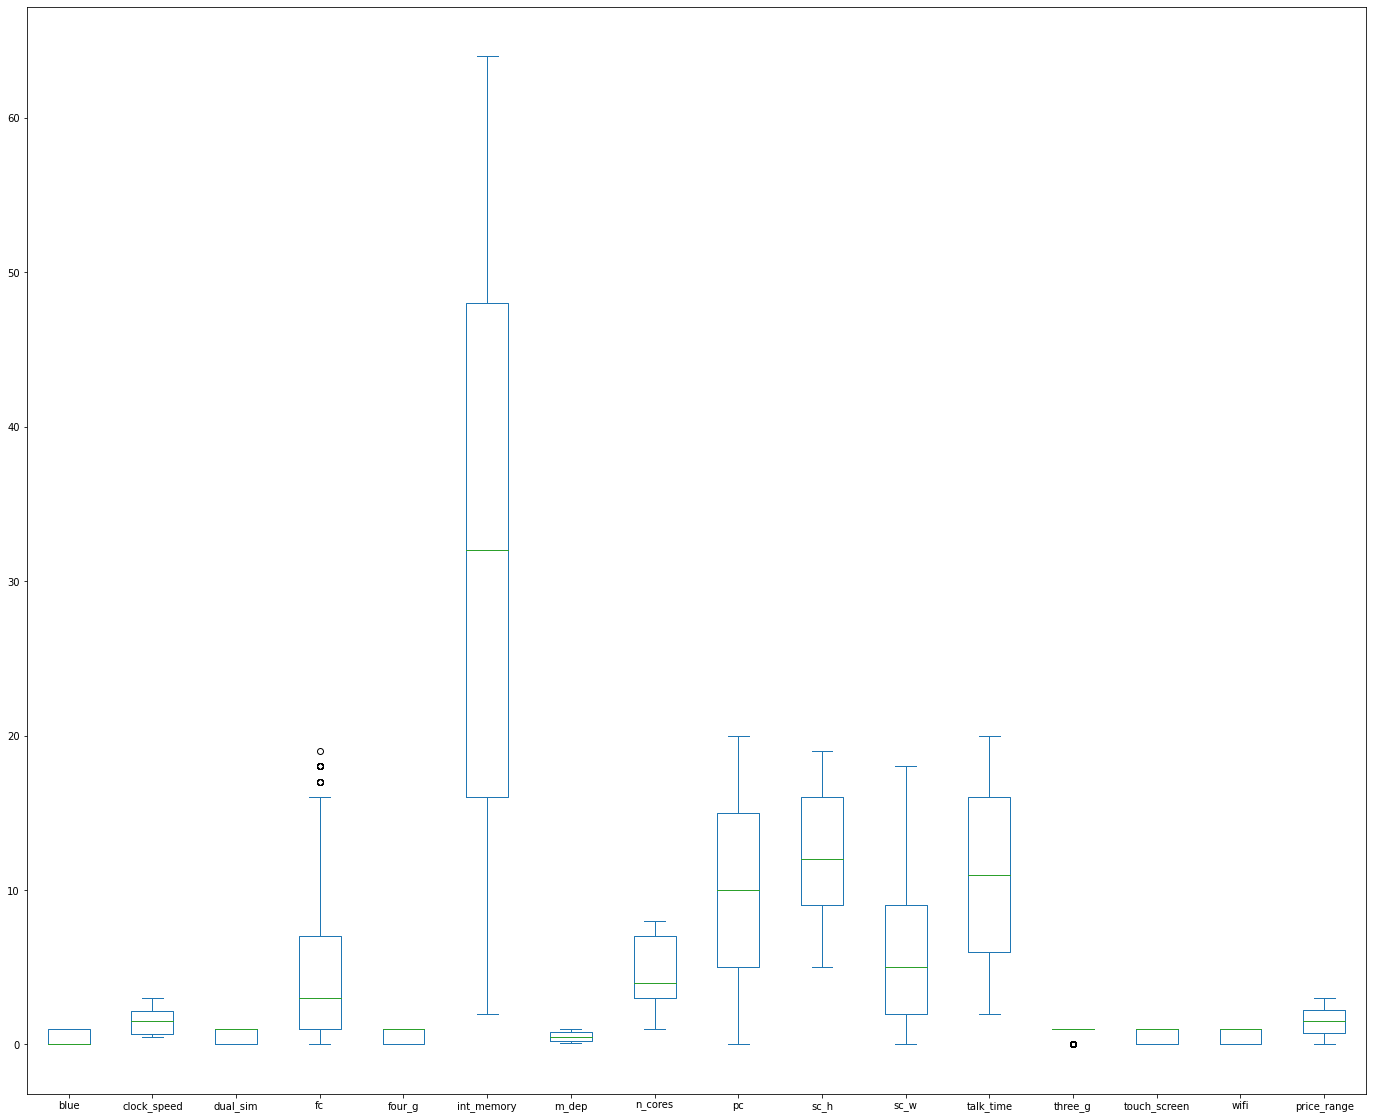

In [32]:
otherData = trainData.drop(['ram', 'battery_power','px_height','px_width','mobile_wt'], axis = 1)
otherData.plot.box(figsize=(24, 20))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

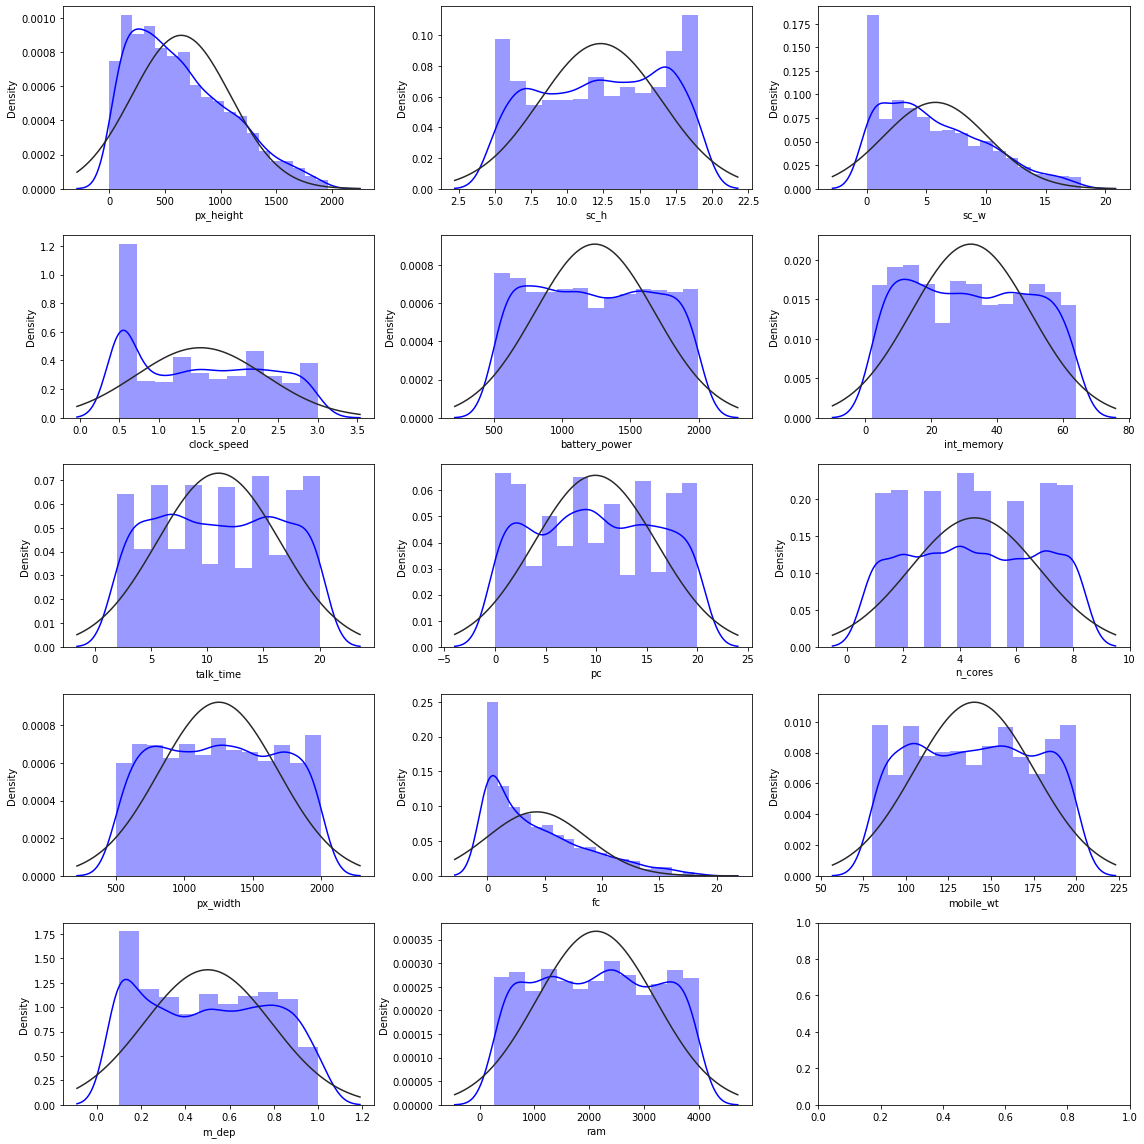

In [13]:
var2 = ['px_height', 'sc_h', 'sc_w', 'clock_speed', 'battery_power', 'int_memory', 'talk_time', 'pc','n_cores', 'px_width', 'fc', 'mobile_wt', 'm_dep', 'ram']
fig, ax = plt.subplots(int(np.ceil(len(var2)/3)), 3, figsize=(16,16))
ax = ax.flatten()
i = 0
for col in var2:
  skew = trainData[col].skew()
  sns.distplot(trainData[col], fit = stats.norm, ax=ax[i] , color = 'Blue')
  i+=1
plt.tight_layout()
plt.show()       

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

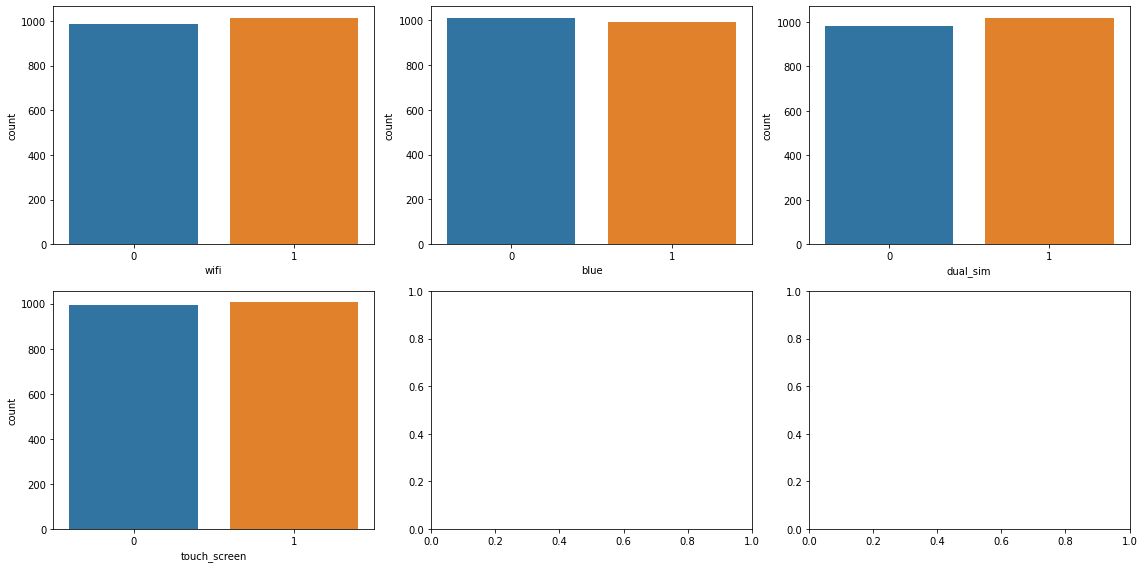

In [20]:
Var2 = ["wifi","blue","dual_sim","touch_screen"]
fig, ax = plt.subplots(int(np.ceil(len(Var2)/3)), 3, figsize=(16,8))
ax = ax.flatten()
i = 0
for col in Var2:
  sns.countplot(trainData[col], ax=ax[i])
  i+=1
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show>

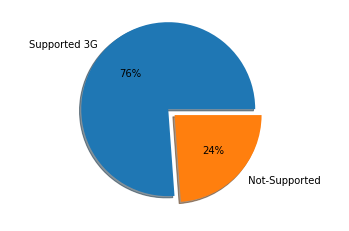

In [15]:
labels= ['Supported 3G', ' Not-Supported']
values=trainData['three_g'].value_counts().values
plt.axis('equal')
plt.pie(values, labels=labels,autopct='%0.00f%%', explode=[0.1,0], shadow=True)
plt.show

<function matplotlib.pyplot.show>

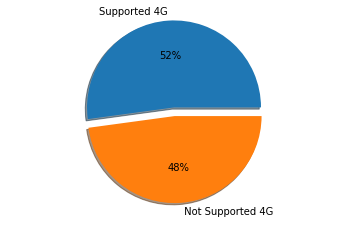

In [16]:
labels= ['Supported 4G', ' Not Supported 4G']
values=trainData['four_g'].value_counts().values
plt.axis('equal')
plt.pie(values, labels=labels,autopct='%0.00f%%', explode=[0.1,0], shadow=True)
plt.show

<function matplotlib.pyplot.show>

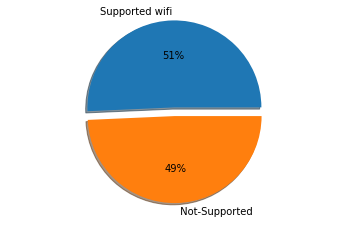

In [17]:
labels= ['Supported wifi', ' Not-Supported']
values=trainData['wifi'].value_counts().values
plt.axis('equal')
plt.pie(values, labels=labels,autopct='%0.00f%%', explode=[0.1,0], shadow=True)
plt.show

<function matplotlib.pyplot.show>

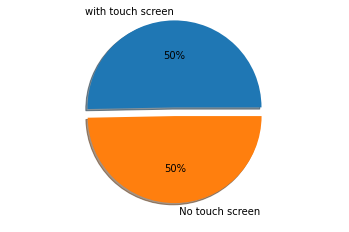

In [18]:
labels= ['with touch screen', ' No touch screen']
values=trainData['touch_screen'].value_counts().values
plt.axis('equal')
plt.pie(values, labels=labels,autopct='%0.00f%%', explode=[0.1,0], shadow=True)
plt.show

# **hypothesis testing**

 wifi increase relation with price

In [37]:
withWifi = trainData[trainData['wifi'] == 1]
withoutWifi = trainData[trainData['wifi'] == 0]

In [38]:
withWifi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1014 non-null   int64  
 1   blue           1014 non-null   int64  
 2   clock_speed    1014 non-null   float64
 3   dual_sim       1014 non-null   int64  
 4   fc             1014 non-null   int64  
 5   four_g         1014 non-null   int64  
 6   int_memory     1014 non-null   int64  
 7   m_dep          1014 non-null   float64
 8   mobile_wt      1014 non-null   int64  
 9   n_cores        1014 non-null   int64  
 10  pc             1014 non-null   int64  
 11  px_height      1014 non-null   int64  
 12  px_width       1014 non-null   int64  
 13  ram            1014 non-null   int64  
 14  sc_h           1014 non-null   int64  
 15  sc_w           1014 non-null   int64  
 16  talk_time      1014 non-null   int64  
 17  three_g        1014 non-null   int64  
 18  touch_sc

In [40]:
withoutWifi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 1 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  986 non-null    int64  
 1   blue           986 non-null    int64  
 2   clock_speed    986 non-null    float64
 3   dual_sim       986 non-null    int64  
 4   fc             986 non-null    int64  
 5   four_g         986 non-null    int64  
 6   int_memory     986 non-null    int64  
 7   m_dep          986 non-null    float64
 8   mobile_wt      986 non-null    int64  
 9   n_cores        986 non-null    int64  
 10  pc             986 non-null    int64  
 11  px_height      986 non-null    int64  
 12  px_width       986 non-null    int64  
 13  ram            986 non-null    int64  
 14  sc_h           986 non-null    int64  
 15  sc_w           986 non-null    int64  
 16  talk_time      986 non-null    int64  
 17  three_g        986 non-null    int64  
 18  touch_scr

In [41]:

from scipy import stats
alpha = 0.05
fstat,p_value = stats.f_oneway(withWifi.price_range ,withoutWifi.price_range)

print('f stat : {} , p_value : {}'.format(fstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f stat : 0.7052814584644053 , p_value : 0.4011151943557232
accept null hypothesis


width and height are related


In [44]:
from scipy.stats import pearsonr
#stat, pValue = pearsonr(train['n_cores'], train['ram'])
stat, pValue = pearsonr(trainData['px_width'], trainData['px_height'])
print('stat=%.3f, p=%.3f' % (stat, pValue))
if pValue > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.511, p=0.000
Probably dependent


four g effect has no efect on price

In [46]:
alpha = 0.05 
withFourG = trainData[trainData['four_g'] == 1]
withOutFourG = trainData[trainData['four_g'] == 0]
tstat,p_value = stats.ttest_ind(withFourG['price_range'],withOutFourG['price_range'],equal_var = True)

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 0.6603526788823791 , p_value : 0.509103652976587
accept null hypothesis


Primary Camera mega pixels has no effect on price Range

In [48]:
price1 = trainData[trainData['price_range'] == 0]
price2 = trainData[trainData['price_range'] == 1]
price3 = trainData[trainData['price_range'] == 2]
price4 = trainData[trainData['price_range'] == 3]

alpha = 0.05 
fstat,p_value = stats.f_oneway(price1['pc'] ,price2['pc'] ,price3['pc'],price4['pc'] )

print('f stat : {} , p_value : {}'.format(fstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f stat : 0.8254463576890608 , p_value : 0.4797489023362932
accept null hypothesis


relation between bluetooth and wifi

In [50]:
from scipy.stats import chi2_contingency
alpha = 0.05 
tstat,p_value = stats.ttest_ind(trainData['blue'],trainData['wifi'],equal_var = True)

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : -0.7588130322999621 , p_value : 0.44800914054586727
accept null hypothesis


# logistic regression

In [52]:
train = pd.read_csv('PhoneData/train.csv')

In [53]:
x = train.drop('price_range',axis=1)
y = train['price_range']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.67

confusion matrix

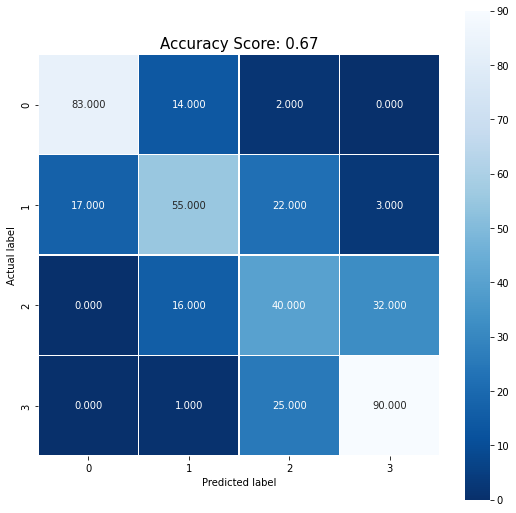

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_pred= model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
score = model.score(X_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83        99
           1       0.64      0.57      0.60        97
           2       0.45      0.45      0.45        88
           3       0.72      0.78      0.75       116

    accuracy                           0.67       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.67      0.67      0.67       400



is data balance

In [58]:
train = pd.read_csv('PhoneData/train.csv')
train["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# Linear regression

In [149]:
trainData = pd.read_csv('PhoneData/train.csv')
x = trainData.drop('price_range',axis=1)
y = trainData['price_range']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=40)

lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9241890395808008

# scaling Data

In [112]:
train = pd.read_csv('PhoneData/train.csv')
train.shape

(2000, 21)

In [113]:
trainPart, testPart = train_test_split(train, test_size=0.2, random_state=30)

In [114]:
print(trainPart.shape)
print(testPart.shape)

(1600, 21)
(400, 21)


In [119]:
for cols in (trainPart.columns):
  if(cols != "price_range"):
    if(trainPart[cols].nunique()!=2 ):
      trainPart[cols] = ((trainPart[cols]-trainPart[cols].mean())/(trainPart[cols].std()))
      testPart[cols] = ((testPart[cols]-testPart[cols].mean())/(testPart[cols].std()))

remove outlier


In [122]:
for cols in trainPart.columns:
  if(cols != "price_range"):
    upperRange = trainPart[cols].mean() + (3 * trainPart[cols].std())
    lowerRange = trainPart[cols].mean() - (3 * trainPart[cols].std())

    indexs = trainPart[(trainPart[cols] > upperRange) | (trainPart[cols] < lowerRange)].index
    trainPart = trainPart.drop(indexs)

for cols in testPart.columns:
  if(cols != "price_range"):
    upperRange = testPart[cols].mean() + (3 * testPart[cols].std())
    lowerRange = testPart[cols].mean() - (3 * testPart[cols].std())

    indexs = testPart[(testPart[cols] > upperRange) | (testPart[cols] < lowerRange)].index
    testPart = testPart.drop(indexs)  


In [91]:
  print(trainPart.shape)
  print(testPart.shape)

(1588, 21)
(399, 21)


minMax scaller

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for cols in trainPart.columns:
  if(cols != "price_range"):
    if(trainPart[cols].nunique()!=2):
      trainPart[cols] = scaler.fit_transform(trainPart[[cols]])
      testPart[cols] = scaler.fit_transform(testPart[[cols]])


In [124]:
trainPart.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1572,0.263193,0,0.00,1,0.3750,0,0.225806,0.222222,0.700000,1.000000,0.70,0.067093,0.717623,0.765901,0.142857,0.000000,0.111111,0,0,1,2
1442,0.315297,0,0.00,1,0.3125,0,0.822581,0.444444,0.966667,0.571429,0.35,0.055911,0.058745,0.428915,0.571429,0.555556,0.777778,0,1,0,1
1516,0.387442,1,0.56,1,0.8125,1,0.645161,0.000000,0.175000,0.857143,0.85,0.044196,0.210948,0.587921,0.142857,0.222222,0.277778,1,0,0,1
259,0.706747,1,0.44,1,0.3750,1,0.064516,0.444444,0.683333,0.714286,0.85,0.095314,0.706943,0.827365,0.285714,0.055556,0.055556,1,1,1,3
945,0.221109,0,0.24,0,0.0000,1,0.709677,0.222222,0.108333,0.714286,0.00,0.436635,0.578104,0.818012,0.214286,0.000000,0.944444,1,1,0,3


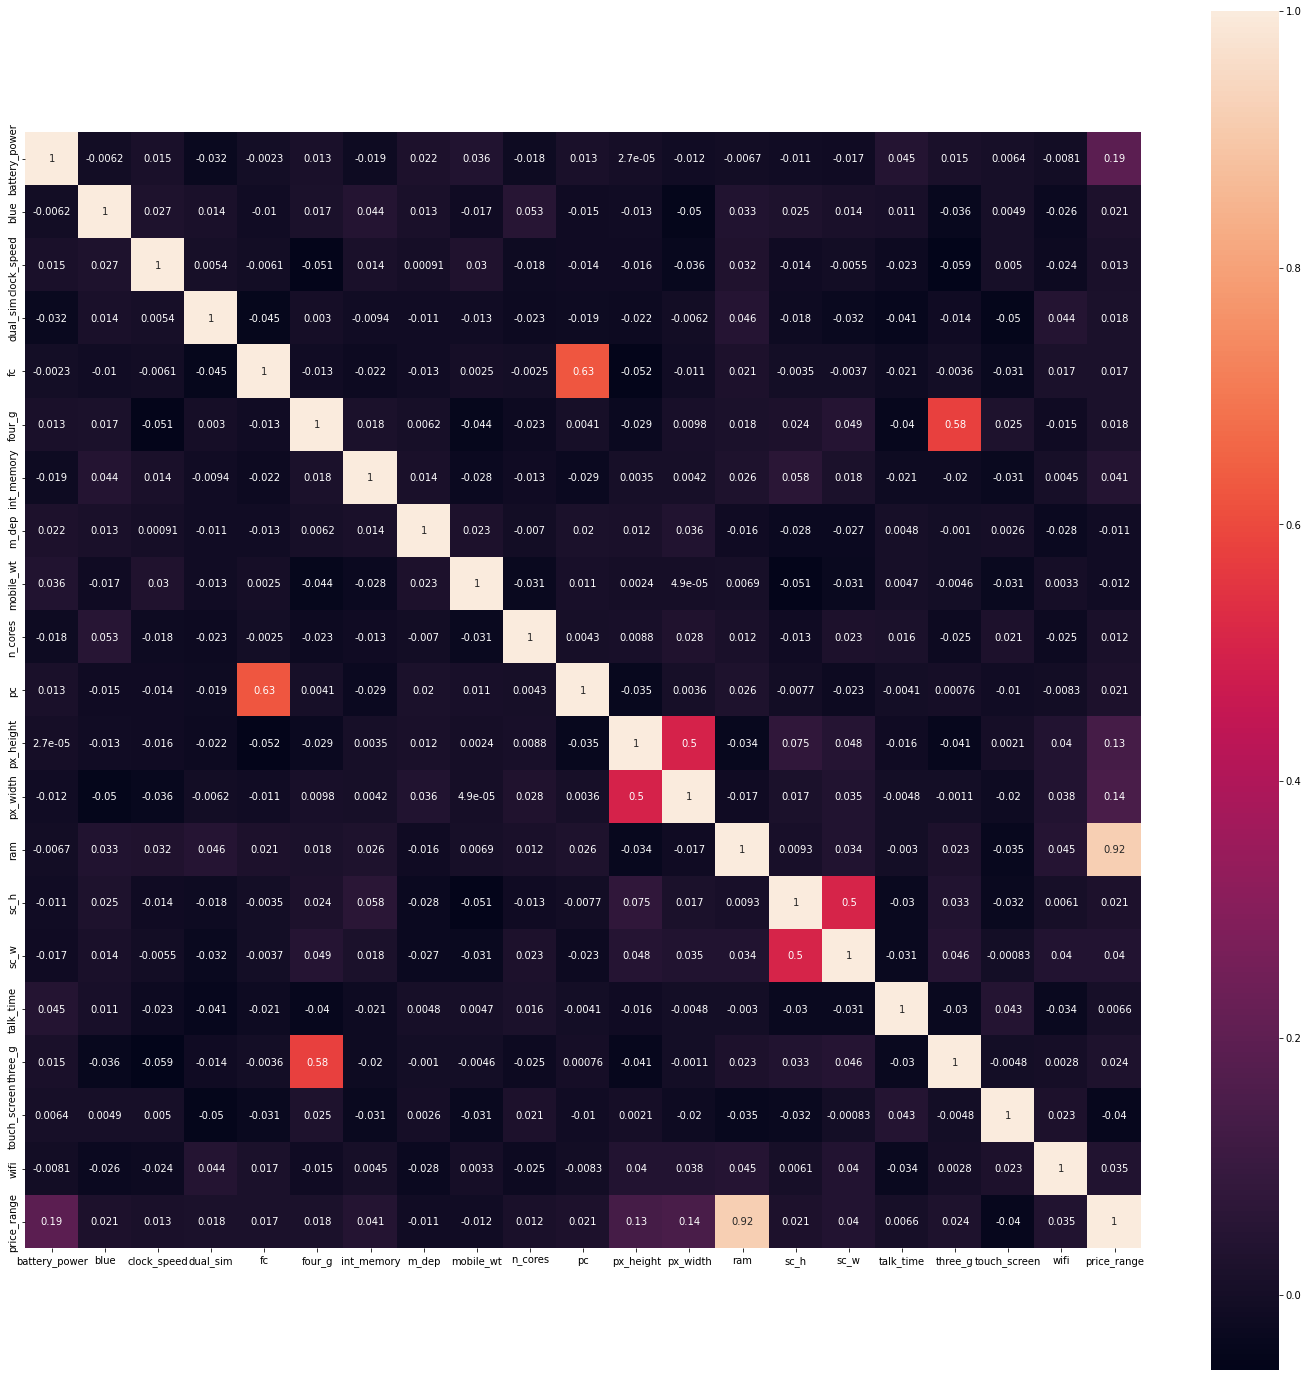

In [125]:


f , ax = plt.subplots(figsize=(25,25))
sns.heatmap(trainPart.corr() , square = True , annot = True)

In [127]:
x_train = trainPart.drop('price_range',axis=1).values
y_train = trainPart['price_range'].values

x_test = testPart.drop('price_range',axis=1).values
y_test = testPart['price_range'].values


model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9223057644110275

model got so much better

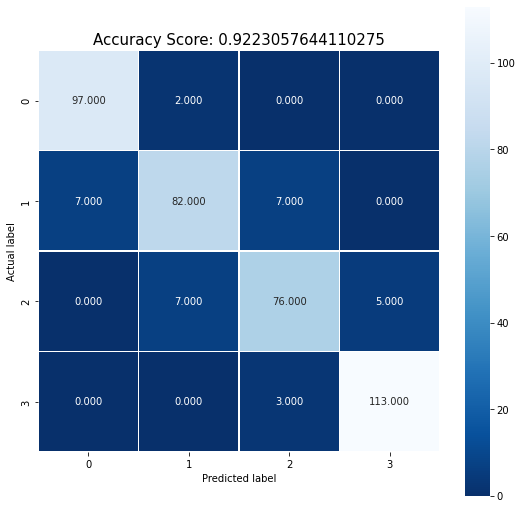

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_pred= model.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
score = model.score(x_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        99
           1       0.90      0.85      0.88        96
           2       0.88      0.86      0.87        88
           3       0.96      0.97      0.97       116

    accuracy                           0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399



# PCA

In [130]:
trainData = trainData = pd.read_csv('PhoneData/train.csv')
x = trainData.drop('price_range',axis=1).values
y = trainData['price_range'].values
print(x.shape)
print(y.shape)


(2000, 20)
(2000,)


In [131]:
def define_pca(pov):
  pca = PCA(pov)
  xPCA = pca.fit_transform(x)
  print(xPCA.shape)
  return xPCA

In [145]:
def LogisticRegression_PCA(xPCA):
  xPCA = trainData.drop('price_range',axis=1).values
  y = trainData['price_range'].values
  XPCA_train,XPCA_test,y_train,y_test = train_test_split(xPCA,y,test_size=0.2, random_state=30)
  
  model = LogisticRegression()
  model.fit(XPCA_train,y_train)
  print("score of the model is :")
  print(model.score(XPCA_test,y_test))



pca of 75

In [146]:
xPCA75 = define_pca(0.75)
LogisticRegression_PCA(xPCA75)

(2000, 2)
score of the model is :
0.67


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


pca 0.80

In [147]:
xPCA80 = define_pca(0.80)
LogisticRegression_PCA(xPCA80)

(2000, 2)
score of the model is :
0.67


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


pca 99

In [148]:
xPCA99 = define_pca(0.99)
LogisticRegression_PCA(xPCA99)

(2000, 4)
score of the model is :
0.67


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


pca on linear regression

In [152]:
def LinearRegression_PCA(xPCA):
  xPCA = trainData.drop('price_range',axis=1).values
  y = trainData['price_range'].values
  XPCA_train,XPCA_test,y_train,y_test = train_test_split(xPCA,y,test_size=0.2, random_state=30)
  
  lr=LinearRegression()
  lr.fit(XPCA_train,y_train)
  print(lr.score(XPCA_test,y_test))

pca **75**

In [153]:

xPCA75li = define_pca(0.75)
LinearRegression_PCA(xPCA75li)

(2000, 2)
0.9151621930160978


pca 90

In [155]:
xPCA90li = define_pca(0.90)
LinearRegression_PCA(xPCA90li)

(2000, 3)
0.9151621930160978


pca **99**

In [154]:
xPCA99li = define_pca(0.99)
LinearRegression_PCA(xPCA99li)

(2000, 4)
0.9151621930160978


# unbalace Data Test

In [156]:

def changeDataOfPrice(row):
  priceRange = row[20]
  if(priceRange == 1 or priceRange == 2 or priceRange == 3):
    return 5
  else:
    return 0

In [157]:
unbalanceTrainData = pd.read_csv('PhoneData/train.csv')
unbalanceTrainData['price_range'] = unbalanceTrainData.apply(changeDataOfPrice,axis='columns')
unbalanceTrainData['price_range'].value_counts()


5    1500
0     500
Name: price_range, dtype: int64

**linear regression test on unbalance Data**

In [158]:
x = unbalanceTrainData.drop('price_range',axis=1)
y = unbalanceTrainData['price_range']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=31)

lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)


0.5883283180178509

**logistic test on unbalance Data**

In [160]:
x = unbalanceTrainData.drop('price_range',axis=1)
y = unbalanceTrainData['price_range']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=31)
  
model = LogisticRegression()
model.fit(X_train,y_train)
print("score of the model is :")
print(model.score(X_test,y_test))

score of the model is :
0.935


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**SMOTH method for unbalance Data**

In [165]:
from imblearn.over_sampling import SMOTE

x = unbalanceTrainData.drop('price_range',axis=1)
y = unbalanceTrainData['price_range']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=40)

sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X_train, y_train)

In [173]:
y_res.value_counts()

5    1208
0    1208
Name: price_range, dtype: int64

In [174]:
#linear regression
lr=LinearRegression()
lr.fit(X_res,y_res)
print("linear regression score :")
print(lr.score(X_test,y_test))
#logistic model
model = LogisticRegression()
model.fit(X_res,y_res)
print("logistic regression score :")
print(model.score(X_test,y_test))

linear regression score :
0.5328652526433125
logistic regression score :
0.915


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
